[View in Colaboratory](https://colab.research.google.com/github/aksh98/FintechProject/blob/master/NowCastingData_Regression.ipynb)

In [0]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE

In [0]:
!pip install -U -q PyDrive


In [0]:
from google.colab import files
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
creds = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)




In [5]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving GoogleTrendsData.csv to GoogleTrendsData.csv
User uploaded file "GoogleTrendsData.csv" with length 4934 bytes


In [7]:
!ls
!cd sample_data/

adc.json  datalab  GoogleTrendsData.csv  sample_data


In [12]:
%cd ..
!ls

/content
adc.json  datalab  GoogleTrendsData.csv  sample_data


In [54]:
datafile = pd.read_csv('GoogleTrendsData.csv')
datafile.shape

(176, 8)

In [55]:
# datafile.shape[0]
datafile.tail()

,Month,Employment,Unemployment,Productivity,GDP,Stock market,jobs,UMEX
171,2018-04,74,18,1,4,13,68,127.0
172,2018-05,71,16,1,4,9,68,134.0
173,2018-06,71,17,1,3,9,71,132.0
174,2018-07,71,18,1,5,9,71,NaN
175,2018-08,85,16,1,5,11,81,NaN


In [0]:
# print(datafile['UMEX'].max())
# print(datafile['UMEX'].min())

datafile.drop(datafile.tail(2).index,inplace=True)

In [57]:
datafile.tail()

,Month,Employment,Unemployment,Productivity,GDP,Stock market,jobs,UMEX
169,2018-02,72,20,1,5,27,63,136.0
170,2018-03,71,17,1,4,15,64,134.0
171,2018-04,74,18,1,4,13,68,127.0
172,2018-05,71,16,1,4,9,68,134.0
173,2018-06,71,17,1,3,9,71,132.0


In [0]:
Y = datafile['UMEX']
X = datafile[['Employment','Unemployment','Productivity','GDP','Stock market','jobs']]

In [95]:
X.head()
print(X.shape)

(174, 6)


In [96]:
Y.tail()
# Y.shape 

169    136.0
170    134.0
171    127.0
172    134.0
173    132.0
Name: UMEX, dtype: float64

In [0]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)

[-2.12628947 -0.70403631 32.96498753  3.80722205 -1.8543325   1.27811563]
163.82864275589995
tsne shape -  (174, 2)


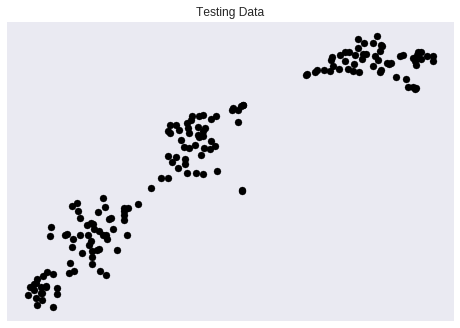

134.0  -> 120.01
111.0  -> 97.91
117.0  -> 84.83
56.0  -> 62.22
114.0  -> 97.46
88.0  -> 80.44
100.0  -> 95.97
60.0  -> 111.41
128.0  -> 122.59
96.0  -> 96.04
113.0  -> 103.54
129.0  -> 111.77
98.0  -> 100.48
21.0  -> 67.02
123.0  -> 122.33
53.0  -> 85.24
68.0  -> 77.12
79.0  -> 81.04
102.0  -> 99.08
111.0  -> 99.87
117.0  -> 106.70
112.0  -> 80.87
63.0  -> 105.82
129.0  -> 126.27
114.0  -> 74.39
124.0  -> 122.79
97.0  -> 102.33
19.0  -> 55.64
45.0  -> 56.47
115.0  -> 115.65
123.0  -> 115.61
110.0  -> 96.59
123.0  -> 114.18
114.0  -> 103.40
122.0  -> 118.35


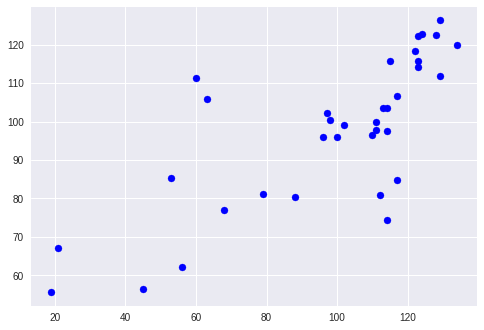

In [98]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

reg = LinearRegression()
reg.fit(X_train,Y_train)
print(reg.coef_)
print(reg.intercept_)

tsne = TSNE(n_components=2).fit_transform(X)
print("tsne shape - ",tsne.shape)

plt.scatter(tsne[:,0],tsne[:,1],color = 'black')
plt.title('Testing Data')
plt.xticks(())
plt.yticks(())
test = np.asarray(Y_test)
# plt.plot(test,reg.predict(X_test),color = 'red',linewidth=3)
plt.show()

arr = reg.predict(X_test)
for i in range(0,len(Y_test)):
  print(test[i]," -> %.2f"%arr[i])

plt.scatter(test,arr,color='blue')
plt.show()

[-2.0705459  -0.72150071 29.63221344  3.98430806 -1.88521864  1.23250729]
166.18452166769794
tsne shape -  (174, 2)


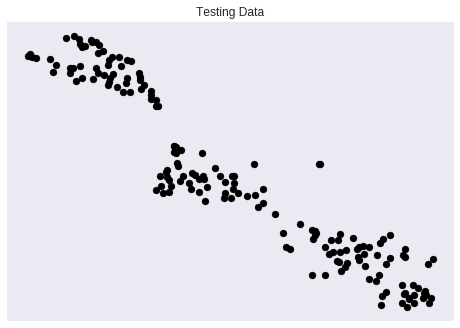

134.0  -> 120.04
111.0  -> 97.87
117.0  -> 83.35
56.0  -> 62.69
114.0  -> 95.56
88.0  -> 81.45
100.0  -> 94.74
60.0  -> 109.65
128.0  -> 122.70
96.0  -> 94.21
113.0  -> 103.86
129.0  -> 112.28
98.0  -> 99.12
21.0  -> 67.39
123.0  -> 122.42
53.0  -> 86.39
68.0  -> 77.19
79.0  -> 81.42
102.0  -> 97.48
111.0  -> 99.78
117.0  -> 106.19
112.0  -> 79.49
63.0  -> 105.41
129.0  -> 126.33
114.0  -> 75.56
124.0  -> 122.24
97.0  -> 102.03
19.0  -> 56.37
45.0  -> 56.70
115.0  -> 114.96
123.0  -> 115.89
110.0  -> 96.33
123.0  -> 113.95
114.0  -> 103.55
122.0  -> 118.46


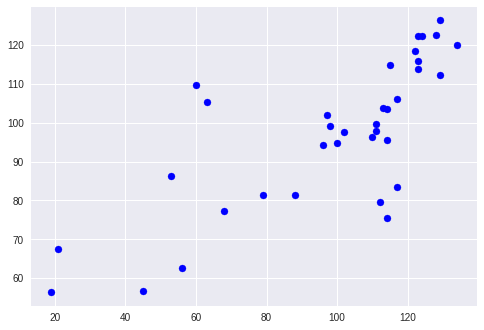

In [100]:
regr = linear_model.RidgeCV(alphas=[0.1,1.0,10.0])
regr.fit(X_train,Y_train)
print(regr.coef_)
print(regr.intercept_)

tsne = TSNE(n_components=2).fit_transform(X)
print("tsne shape - ",tsne.shape)

plt.scatter(tsne[:,0],tsne[:,1],color = 'black')
plt.title('Testing Data')
plt.xticks(())
plt.yticks(())
# plt.plot(Y_test,reg.predict(X_test),color = 'red',linewidth=3)
plt.show()

test = np.asarray(Y_test)
arr = regr.predict(X_test)
for i in range(0,len(Y_test)):
  print(test[i]," -> %.2f"%arr[i])
  
plt.scatter(test,arr,color='blue')
plt.show()